<h1 align=center>Starbucks Project</h1>
<h2 align=center>Machine Learning Nanodegree Capstone</h2>
<hr style="border: 1px solid black">


## I. Definition

### Project Overview

The purpose of this project is to analyze from simulated Starbucks' customers data provided by Starbucks and Udacity, in order to gain insight on the relationship of the customers' attributes and their response to promotional offers being given to them.

Once in a while, Starbucks sends promotional offer to its mobile customers and the data gained from it are being used to simulate the dataset this project is based on.

From a business perspective, it is important to understand whether an offer is effective and how to personalize offers based on customers' attributes. This personalization could improve the efficacy of the promotional offer itself and might even increase the revenue, if more people are being attracted to buy based on that personalized offer.

Some research has been conducted using machine learning model to classify things based on marketing data. It is a good practice to learn from them before solving problems in the marketing area and using the marketing data. The followings are some of them:

* [https://www.researchgate.net/publication/282657577_Marketing_Research_Data_Classification_by_Means_of_Machine_Learning_Methods](https://www.researchgate.net/publication/282657577_Marketing_Research_Data_Classification_by_Means_of_Machine_Learning_Methods)
* [https://www.researchgate.net/publication/260707025_Using_Neural_Networks_for_Marketing_Research_Data_Classification](https://www.researchgate.net/publication/260707025_Using_Neural_Networks_for_Marketing_Research_Data_Classification)


Also, this project is a great fit for students of Data Science or Machine Learning to tinker on, since it would widen their experience on a different kind of dataset and also for them to engineer features that matter and algorithm that would perform best.

### Problem Statement
> Would a customer respond to a particular offer?

* The problem of this project would be a classification problem: there needs to be a classification of whether a promotional offer is going to make a customer reponds or not.
* An approach to this problem would be to see if there could be a pattern emerged from customer's attributes and the promotional offer's data (duration, rewards, etc.) to determine whether a customer would respond to a promotional offer: customer's attributes and promotional offer's data to be the inputs and a binary classification of responding or not would be the output.
* Thus, a model needs to be built based on those inputs and it is expected to output a binary classification: whether a customer would respond (with the value of `1`) or not (with the value of `0`).

### Metrics
The metric to be used for the evaluation of this project would be the accuracy level, since it is more important to maximize the true positives and true negatives (whether an offer would get a response), rather than to minimize the false positives or false negatives (customers get an offer s/he would not respond to).

Additionally, a preliminary data exploration suggests a slight imbalance, but still not large enough for the accuracy metrics to render to be a bad metric. Even so, an F1 metric would also be analyzed further to complement the accuracy measure.

## II. Analysis

### Data Exploration

In [1]:
# import python libraries
import pandas as pd
import numpy as np

In [2]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

***
#### 1. Portfolio Data Exploration

In [3]:
# view the portfolio data
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [4]:
# get the high level view of the portfolio data
portfolio.describe()

,difficulty,duration,reward
count,10.000000,10.000000,10.000000
mean,7.700000,6.500000,4.200000
std,5.831905,2.321398,3.583915
min,0.000000,3.000000,0.000000
25%,5.000000,5.000000,2.000000
50%,8.500000,7.000000,4.000000
75%,10.000000,7.000000,5.000000
max,20.000000,10.000000,10.000000


In [5]:
# get the data types of the portfolio data
portfolio.dtypes

channels      object
difficulty     int64
duration       int64
id            object
offer_type    object
reward         int64
dtype: object

In [6]:
# get value counts of offer types
portfolio['offer_type'].value_counts()

bogo             4
discount         4
informational    2
Name: offer_type, dtype: int64

**Remarks**: Portfolio dataset only has ten data points or offers, thus it is easy to explore the data without using any python coding. From the overview of the data above, it can be seen that `channels` contains a list of channels where the promotional offers are sent with and that the `offer_type` contains categorical value of what kind of offer it is. Both of those columns could be expanded by using the one-hot encoding method in the data preprocessing step.

Also, there is no abnormalities in the values of the data. One thing to notice would be that the `informational` offer does not give any kind of rewards to the customers: it might contain only informational news, e.g. highlighting the product features, as the type suggests.

***
#### 2. Profile Data Exploration

In [7]:
# view the profile data
print(f'The shape of the dataset: {profile.shape}')
profile.head(10)

The shape of the dataset: (17000, 5)


,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN
5,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0
6,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN
8,65,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0
9,118,20161122,None,8974fc5686fe429db53ddde067b88302,NaN


In [8]:
# get the high level view of the profile data
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [9]:
# get the data types of the profile data
profile.dtypes

age                   int64
became_member_on      int64
gender               object
id                   object
income              float64
dtype: object

In [10]:
# get missing value data per column
for column in profile.columns:
    missing_count = profile[column].isnull().sum()
    print(f'Number of missing values in {column}: {missing_count} ({missing_count / profile.shape[0]} of the total data)')

Number of missing values in age: 0 (0.0 of the total data)
Number of missing values in became_member_on: 0 (0.0 of the total data)
Number of missing values in gender: 2175 (0.12794117647058822 of the total data)
Number of missing values in id: 0 (0.0 of the total data)
Number of missing values in income: 2175 (0.12794117647058822 of the total data)


In [11]:
# get value counts of gender
print('Value counts of gender in profile dataset:')
profile['gender'].value_counts()

Value counts of gender in profile dataset:


M    8484
F    6129
O     212
Name: gender, dtype: int64

In [12]:
# get value counts of id, in case there are any duplicates
profile['id'].value_counts().sort_values(ascending=False).iloc[:10]

684644265732451ba78dbcb6b639c1c6    1
a206d7f1c7124bd0b16dd13e7932592e    1
14beaba5927246a8891d3c74257a9a99    1
f4a11bc75a014ad9996a79170fb59ec9    1
9209b9540a0c4ae08cda81a6db0e4019    1
9708b3de4f8740b29a545c034c0f1cdb    1
a7af9c686496460b8544aa8fb882649d    1
df6fd073309e42ecb1ab53d3daa6e13b    1
20570cb0c03947699a75887bb6a65145    1
f3eadb24229f420cbf068fdf0fe05eca    1
Name: id, dtype: int64

**Remarks**: There are 17,000 data points or customers in the profile dataset. Out of that number, there are 2,175 missing values or around 12.79% from the `gender` and `income` columns.

For the missing values in the income column, I would impute it with the median income, as it would predict the central tendency of the income column. The trade-off is that there would be less variation from the income feature: the income feature would have less predictive power.

However, since it only comprises of 12.79% of the total data, it might prove useful to still include these data points and impute the missing value, since removing them might decrease the variation of the other features, such as the age feature.

For the missing values in the gender column, they would be taken into account by the use of one-hot encoding for the gender column: inferred by having 0 value in the M, F, and O columns (all the values in the gender column). I deliberately not imputing anything, since it might be useful to assume that an absence of the value here might have a predictive quality.

Also, for the `became_member_on` column, since the values are now on a format of integer, they would be first processed by casting it into a datetime format, then they would be formatted further as timestamp, and then they would be scaled or normalized.

Further, there are age values of `118` quite often showing in the data point which has missing value in the gender and income columns. This might be a placeholder value for data point with missing data. Depending on the distribution, which is going to be explored in the below step, I might replace these values with the median age instead.

***
#### 3. Transcript Data Exploration

In [13]:
# view the profile data
print(f'The shape of the dataset: {transcript.shape}')
transcript.head(10)

The shape of the dataset: (306534, 4)


,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
5,offer received,389bc3fa690240e798340f5a15918d5c,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
6,offer received,c4863c7985cf408faee930f111475da3,0,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,{'offer id': '3f207df678b143eea3cee63160fa8bed'}
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
9,offer received,31dda685af34476cad5bc968bdb01c53,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}


In [14]:
# get the high level view of the profile data
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [15]:
# get the data types of the profile data
transcript.dtypes

event     object
person    object
time       int64
value     object
dtype: object

In [16]:
# get missing value data per column
for column in transcript.columns:
    missing_count = transcript[column].isnull().sum()
    print(f'Number of missing values in {column}: {missing_count} ({missing_count / transcript.shape[0]} of the total data)')

Number of missing values in event: 0 (0.0 of the total data)
Number of missing values in person: 0 (0.0 of the total data)
Number of missing values in time: 0 (0.0 of the total data)
Number of missing values in value: 0 (0.0 of the total data)


In [17]:
# get value counts of event
print('Value counts of event in transcript dataset:')
transcript['event'].value_counts()

Value counts of event in transcript dataset:


transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [18]:
from tqdm import tqdm
from pprint import pprint

# get a view on the value column, based on the event value
value_event_set = set()
idx = 0

for value in tqdm(transcript['value']):
    value_keys = tuple(value.keys())
    event = transcript.iloc[idx]['event']
    value_event_set.add((event, value_keys))
    idx += 1
        
print("The set of combinations of event and value columns' values in the data set")
pprint(value_event_set)

100%|██████████| 306534/306534 [01:02<00:00, 4874.65it/s]

The set of combinations of event and value columns' values in the data set
{('offer completed', ('offer_id', 'reward')),
 ('offer received', ('offer id',)),
 ('offer viewed', ('offer id',)),
 ('transaction', ('amount',))}


**Remarks**: There seems to be no missing values in this dataset, which is great. However, there are some tricky structure of the values, which corresponds exactly on what the event type is, e.g. there are two ways to get the offer ID: `offer_id` and `offer id`, depending on the value of the event. This would be relevant in how to preprocess the data to get the data points which are to be the input of the models to be trained below.

In general, I would like to produce a dataset whose data points consist of costumer's attributes, the offer's attributes, and the class of whether the customer responds. A response would then be defined as whether an offer being received by the customer (inferred from the `offer_id` key in the value column and the `offer received` value in the event column) ended up being used by the customer (inferred from the `offer id` key in the value column and the `offer completed` value in the event column).

Thus, I might need to produce new columns for the `offer_id` inferred from the `value` column in this dataset and it might be the case that the key of `reward` and `amount` would not be included, since we only care about whether the customers respond, not how much revenue from transaction has an offer generated.

### Exploratory Visualization
In this section, you will need to provide some form of visualization that summarizes or extracts a relevant characteristic or feature about the data. The visualization should adequately support the data being used. Discuss why this visualization was chosen and how it is relevant. Questions to ask yourself when writing this section:
- _Have you visualized a relevant characteristic or feature about the dataset or input data?_
- _Is the visualization thoroughly analyzed and discussed?_
- _If a plot is provided, are the axes, title, and datum clearly defined?_


In [19]:
# import python libraries
import matplotlib.pyplot as plt
import seaborn as sns

***
#### 1. Portfolio Data Visualization

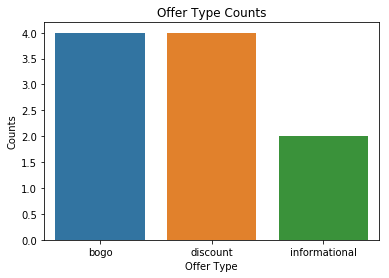

In [20]:
# get visual counts of offer types
offer_types = portfolio['offer_type'].value_counts()
offer_types_index = offer_types.index

plt.title('Offer Type Counts')
plt.xlabel('Offer Type')
plt.ylabel('Counts')
sns.barplot(offer_types_index, list(offer_types));

**Remarks**: There are four bogos, four discounts, and two informationals type of offers in the portfolio dataset. The imbalance here (of the informational type being only half as many as the others) does not really relevant, since the relevant one would be the imbalance of the data for each label class (the respond and the non-repond class).

***
#### 2. Profile Data Visualization

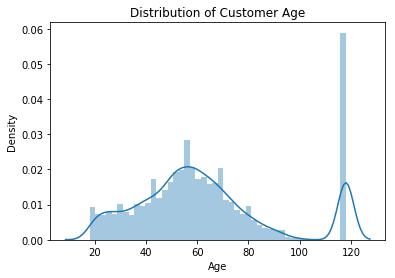

In [21]:
# get the visual of customers' age
customer_age = list(profile['age'])

plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Density')
sns.distplot(customer_age);

**Remarks**: It is highly likely that the age of `118` found above is the result of a placeholder value assigned whenever there are no data for the customer (gender and income). Thus, I will replace the value with the median age instead.

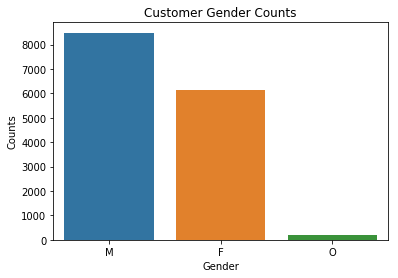

In [22]:
# get visual counts of customers' gender
customer_gender = profile['gender'].value_counts()
customer_gender_index = customer_gender.index

plt.title('Customer Gender Counts')
plt.xlabel('Gender')
plt.ylabel('Counts')
sns.barplot(customer_gender_index, list(customer_gender));

**Remarks**: There is imbalance by gender, but there should be no relevant consequences for this, as the only relevant imbalance would be the one based on the class label.

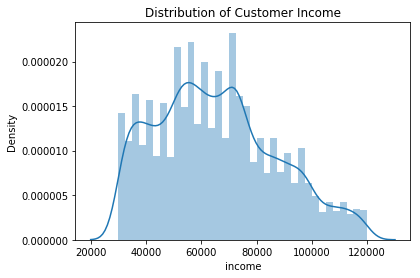

In [23]:
# get the visual of customers' income
customer_income = profile['income']
customer_income = customer_income.dropna() # drop missing values (NaN)

plt.title('Distribution of Customer Income')
plt.xlabel('Income')
plt.ylabel('Density')
sns.distplot(customer_income);

**Remarks**: The income data is quite good: it could resemble a rightly-skewed distribution. Thus standardizing the values of this column could be done without any other preprocessing step.

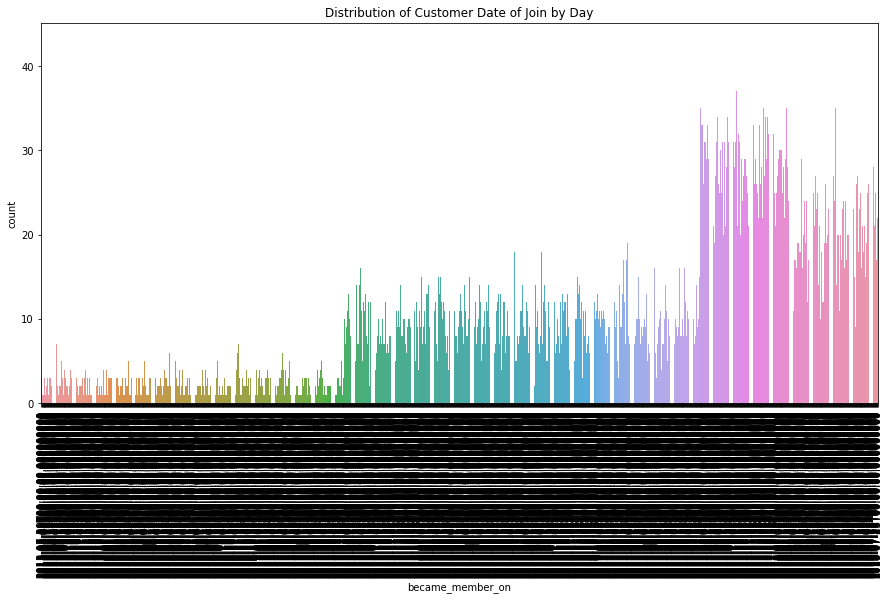

In [24]:
# get the visual of customers' became_member_on by date
customer_join_date = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')

plt.figure(figsize=(15, 7))
plt.title('Distribution of Customer Date of Join by Day')
fig = sns.countplot(customer_join_date)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90);

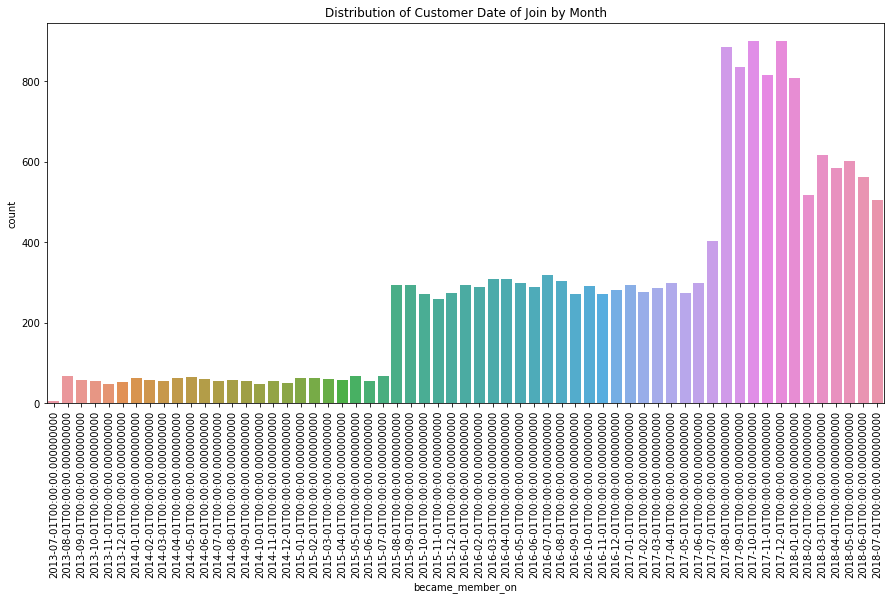

In [25]:
# get the visual of customers' became_member_on by month
customer_join_date = pd.to_datetime(profile['became_member_on'] // 100, format='%Y%m') # integer division to obtain month

plt.figure(figsize=(15, 7))
plt.title('Distribution of Customer Date of Join by Month')
fig = sns.countplot(customer_join_date)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90);

**Remarks**: The distribution of the customer date of join is rather imbalance: the early dates have few customer join counts, while the later dates have many. On whether to use day or month casting, it might be useful to just stick with the day format, as it would result in a more granular value when doing scaling on the preprocessing step.

***
#### 3. Transcript Data Visualization

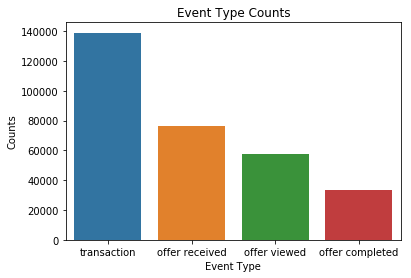

In [26]:
# get visual counts of events' type
event_type = transcript['event'].value_counts()
event_type_index = event_type.index

plt.title('Event Type Counts')
plt.xlabel('Event Type')
plt.ylabel('Counts')
sns.barplot(event_type_index, list(event_type));

**Remarks**: The number of offers being used is about a half of the number of offers given. However, it cannot be assumed that the offers used are the result the offer being given to customer: the customer might not even be aware of the offer s/he received, right until after the transaction. This would be relevant in the way I am going to define what counts as a customer responding to an offer: s/he needs to be aware of it (offer viewed) before the transaction occurs.

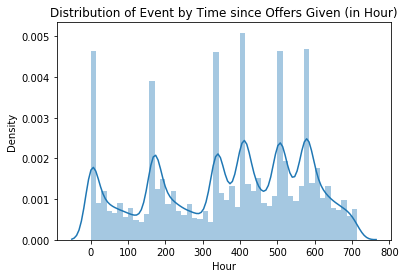

In [27]:
# get the visual of the events' time
event_time = transcript['time']

plt.title('Distribution of Event by Time since Offers Given (in Hour)')
plt.xlabel('Hour')
plt.ylabel('Density')
sns.distplot(list(event_time));

**Remarks**: There seems to be a pattern of events based on the hour after the offers given. The huge spike in the beginning might be dominated by the events of offers being sent to the users. The other spikes would be unknownable by direct observation, but it suggests that this data might be a good feature in determining response for time-series forecasting. 

Thus, it would not be a relevant feature then for this project's problem, since we would like to know whether a customer would respond: the problem is agnostic to *when* does the customer responds or whether s/he responds *given a time* after an offer is received.

### Algorithms and Techniques

1. Preprocess the data: the rationale are provided from the data exploration above.
  * Dropping duplicate rows from all datasets
  * Impute missing values of customers income with the median of income data.
  * Replace customers age of `118` with the median of age data.
  * One-hot encode these columns: customer gender, offer channel, and offer type.
  * Cast `became_member_on` column values into a timestamp of day format.
  * Replace the `value` column of the transcript DF with the `offer_id` column with values inferred.
  * Group the joined dataframe on customer ID then offer ID.
  * Join the grouped dataframe with portfolio and profiles dataframes to add customers and offers attributes.
  * Add labels to the data points by inferring response only to those customers who have received, viewed, and complete the offer.
  * Min-max scale the values of the numerical columns (excluding the one-hot encoded).
  * Split the data into train and test dataset.
2. Obtain a benchmark result
  * Train a basic Naive Bayes algorithm to obtain a benchmark result.
3. Train other algorithm
  * Train the following algorithms with grid-search and cross-validation:
    * Logistic Regression
      * Grid search parameters:
        * penalty: ['l1', 'l2']
        * C: [1, 10, 100, 1000]
        * max_iter: [25, 50, 100]}
      * Cross validation fold: 5
    * Decision Tree
      * Grid search parameters:
        * criterion: ['gini', 'entropy']
        * max_depth: [None, 2, 5]
        * min_samples_split: [2, 5, 10]}
      * Cross validation fold: 5
    * Random Forest
      * Grid search parameters:
        * n_estimators: [25, 50, 100]
        * criterion: ['gini', 'entropy']
        * max_depth: [None, 2, 5]
        * min_samples_split: [2, 5, 10]}
      * Cross validation fold: 5
    * Support Vector Machine
      * Grid search parameters:
        * kernel: ['linear', 'rbf']
        * C: [1, 10, 100]
        * max_iter: [-1, 15, 30]}
      * Cross validation fold: 5
4. Determine the model with the best result

### Benchmark

A Naive Bayes algorithm would be used to be the benchmark algorithm in predicting whether a customer would respond to a particular offer. This is due to that Naive Bayes is a basic algorithm in solving a binary classification problem, without any presumption on what algorithm would best predict the classification, such as that of the problem statement above.

## III. Methodology

### Data Preprocessing

***
#### Dropping duplicates

In [29]:
# view the portfolio dataset
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


**Remarks on Portfolio Dataset**: There is no need to drop duplicates on the portfolio dataset, since it can be seen in the above DF, that there is no duplicate rows in the dataframe.

In [38]:
# Dropping duplicates on profile dataset
raw_profile_shape = profile.shape

profile_clean = profile.drop_duplicates()

# check the before & after shapes
print(f'Shape of the raw profile data: {raw_profile_shape}')
print(f'Shape of the clean profile data: {profile_clean.shape}')

Shape of the raw profile data: (17000, 5)
Shape of the clean profile data: (17000, 5)


In [31]:
# Dropping duplicates on transcript dataset
raw_transcript_shape = transcript.shape
transcript_clean = transcript.copy()

# freeze the value column's values first, to enable dropping duplicates
transcript_clean['value'] = transcript_clean['value'].transform(lambda x: frozenset(x.items()))
transcript_clean = transcript_clean.drop_duplicates()

# change the values back to a dictionary
transcript_clean['value'] = transcript_clean['value'].transform(lambda x: dict(x))

# check the before & after shapes
print(f'Shape of the raw transcript data: {raw_transcript_shape}')
print(f'Shape of the clean transcript data: {transcript_clean.shape}')

Shape of the raw transcript data: (306534, 4)
Shape of the clean transcript data: (306137, 4)


***
#### Impute missing values

In [39]:
# get the median income
median_income = profile_clean['income'].median()

# fill the nan in the income column
profile_clean['income'] = profile_clean['income'].fillna(median_income)

# view the top 10 of the clean profile DF
profile_clean.head(10)

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,64000.0
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,64000.0
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,64000.0
5,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0
6,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,64000.0
7,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,64000.0
8,65,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0
9,118,20161122,None,8974fc5686fe429db53ddde067b88302,64000.0


***
#### Replace invalid age values

In [40]:
# get the median age, excluding the 118
median_age = profile_clean[~(profile_clean['age'] == 118)]['age'].median()

profile_clean['age'] = profile_clean['age'].replace(118, median_age)

In [41]:
# view the top 10 of the clean profile DF
profile_clean.head(10)

,age,became_member_on,gender,id,income
0,55,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,64000.0
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,55,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,64000.0
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,55,20170804,None,a03223e636434f42ac4c3df47e8bac43,64000.0
5,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0
6,55,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,64000.0
7,55,20171002,None,68617ca6246f4fbc85e91a2a49552598,64000.0
8,65,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0
9,55,20161122,None,8974fc5686fe429db53ddde067b88302,64000.0


***
#### One-hot encoding categorical values

In [42]:
# get one hot encoding on customers' gender
gender_dummies = pd.get_dummies(profile_clean['gender'], prefix='gender', dummy_na=True, drop_first=True)

# concatenate the gender dummies to the clean profile DF, then drop  the gender column
profile_clean = pd.concat([profile_clean, gender_dummies], axis=1).drop('gender', axis=1)

# view the top 10 of the clean profile DF
profile_clean.head(10)

,age,became_member_on,id,income,gender_M,gender_O,gender_nan
0,55,20170212,68be06ca386d4c31939f3a4f0e3dd783,64000.0,0,0,1
1,55,20170715,0610b486422d4921ae7d2bf64640c50b,112000.0,0,0,0
2,55,20180712,38fe809add3b4fcf9315a9694bb96ff5,64000.0,0,0,1
3,75,20170509,78afa995795e4d85b5d9ceeca43f5fef,100000.0,0,0,0
4,55,20170804,a03223e636434f42ac4c3df47e8bac43,64000.0,0,0,1
5,68,20180426,e2127556f4f64592b11af22de27a7932,70000.0,1,0,0
6,55,20170925,8ec6ce2a7e7949b1bf142def7d0e0586,64000.0,0,0,1
7,55,20171002,68617ca6246f4fbc85e91a2a49552598,64000.0,0,0,1
8,65,20180209,389bc3fa690240e798340f5a15918d5c,53000.0,1,0,0
9,55,20161122,8974fc5686fe429db53ddde067b88302,64000.0,0,0,1


In [36]:
# get one hot encoding on offers' channel
# courtesy to : https://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies
channels_dummies = pd.get_dummies(portfolio['channels'].apply(pd.Series).stack(), prefix='channel').sum(level=0).drop('channel_web', axis=1)

# get one hot encoding on the offers' type
type_dummies = pd.get_dummies(portfolio['offer_type'], prefix='type', drop_first=True)

# copy the portfolio DF
portfolio_clean = portfolio.copy()

# concatenate the dummies to the clean portfolio DF, then drop the channels & type column
portfolio_clean = pd.concat([portfolio_clean, channels_dummies, type_dummies], axis=1).drop(['channels', 'offer_type'], axis=1)

# view the clean portfolio DF
portfolio_clean

,difficulty,duration,id,reward,channel_email,channel_mobile,channel_social,type_discount,type_informational
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,10,1,1,1,0,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,10,1,1,1,0,0
2,0,4,3f207df678b143eea3cee63160fa8bed,0,1,1,0,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,1,1,0,0,0
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,1,0,0,1,0
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,3,1,1,1,1,0
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,2,1,1,1,1,0
7,0,3,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1,0,1
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,5,1,1,1,0,0
9,10,7,2906b810c7d4411798c6938adc9daaa5,2,1,1,0,1,0


***
#### Cast `became_member_on` values

In [43]:
# cast the became_member_on integer to timestamp
profile_clean['became_member_on'] = pd.to_datetime(profile_clean['became_member_on'], format='%Y%m%d').transform(lambda x: pd.Timestamp.timestamp(x) // 86400) # integer divide by the number of seconds in a day

# view the top 10 of the clean profile DF
profile_clean.head(10)

,age,became_member_on,id,income,gender_M,gender_O,gender_nan
0,55,17209.0,68be06ca386d4c31939f3a4f0e3dd783,64000.0,0,0,1
1,55,17362.0,0610b486422d4921ae7d2bf64640c50b,112000.0,0,0,0
2,55,17724.0,38fe809add3b4fcf9315a9694bb96ff5,64000.0,0,0,1
3,75,17295.0,78afa995795e4d85b5d9ceeca43f5fef,100000.0,0,0,0
4,55,17382.0,a03223e636434f42ac4c3df47e8bac43,64000.0,0,0,1
5,68,17647.0,e2127556f4f64592b11af22de27a7932,70000.0,1,0,0
6,55,17434.0,8ec6ce2a7e7949b1bf142def7d0e0586,64000.0,0,0,1
7,55,17441.0,68617ca6246f4fbc85e91a2a49552598,64000.0,0,0,1
8,65,17571.0,389bc3fa690240e798340f5a15918d5c,53000.0,1,0,0
9,55,17127.0,8974fc5686fe429db53ddde067b88302,64000.0,0,0,1


***
#### Replace the `value` column with  `offer_id` values

In [44]:
# parse the value column to be in a dataframe format
values_df = transcript_clean['value'].apply(pd.Series)

# view the top 10 of the values DF
values_df.head(10)

,offer id,amount,offer_id,reward
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN
2,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN
3,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN
4,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN
5,f19421c1d4aa40978ebb69ca19b0e20d,NaN,NaN,NaN
6,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,NaN,NaN
7,3f207df678b143eea3cee63160fa8bed,NaN,NaN,NaN
8,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN
9,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN


In [45]:
# check the shape of the values_df: of whether it corresponds well with the transcript_clean DF
print(f'Shape of values_df: {values_df.shape}')
print(f'Shape of transcript_clean: {transcript_clean.shape}')

Shape of values_df: (306137, 4)
Shape of transcript_clean: (306137, 4)


In [46]:
# join the "offer_id" and "offer id" columns
offer_id = values_df['offer id'].replace(np.nan, '') + values_df['offer_id'].replace(np.nan, '')

# replace the empty string again to NaN as to not creating new offer id of an empty string when joined
offer_id = offer_id.replace('', np.nan)

# see the top 10 of offer_id
offer_id[:10]

0    9b98b8c7a33c4b65b9aebfe6a799e6d9
1    0b1e1539f2cc45b7b9fa7c272da2e1d7
2    2906b810c7d4411798c6938adc9daaa5
3    fafdcd668e3743c1bb461111dcafc2a4
4    4d5c57ea9a6940dd891ad53e9dbe8da0
5    f19421c1d4aa40978ebb69ca19b0e20d
6    2298d6c36e964ae4a3e7e9706d1fb8c2
7    3f207df678b143eea3cee63160fa8bed
8    0b1e1539f2cc45b7b9fa7c272da2e1d7
9    0b1e1539f2cc45b7b9fa7c272da2e1d7
dtype: object

In [47]:
# concat the offer_id to the transcript dataframe
transcript_clean = pd.concat([transcript_clean, offer_id], axis=1)
transcript_clean.columns = list(transcript_clean.columns)[:-1] + ['offer_id'] # change name of the offer_id column
transcript_clean = transcript_clean.drop('value', axis=1)

# view the top 10 of the clean transcript DF
transcript_clean.head(10)

,event,person,time,offer_id
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer received,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0
5,offer received,389bc3fa690240e798340f5a15918d5c,0,f19421c1d4aa40978ebb69ca19b0e20d
6,offer received,c4863c7985cf408faee930f111475da3,0,2298d6c36e964ae4a3e7e9706d1fb8c2
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,3f207df678b143eea3cee63160fa8bed
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,0b1e1539f2cc45b7b9fa7c272da2e1d7
9,offer received,31dda685af34476cad5bc968bdb01c53,0,0b1e1539f2cc45b7b9fa7c272da2e1d7


***
#### Grouped transcript based on customer ID and offer ID and infer response label

In [48]:
# one-hot encode event values to infer response
event_dummies = pd.get_dummies(transcript_clean['event'])[['offer completed', 'offer received', 'offer viewed']] # only get the offer events

In [49]:
# concat the event dummies to the merged df
transcript_clean_dummies = pd.concat([transcript_clean, event_dummies], axis=1).drop('event', axis=1)

# view the top 10 of transcript_clean_dummies
transcript_clean_dummies.head(10)

,person,time,offer_id,offer completed,offer received,offer viewed
0,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0
1,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0
2,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5,0,1,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4,0,1,0
4,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,1,0
5,389bc3fa690240e798340f5a15918d5c,0,f19421c1d4aa40978ebb69ca19b0e20d,0,1,0
6,c4863c7985cf408faee930f111475da3,0,2298d6c36e964ae4a3e7e9706d1fb8c2,0,1,0
7,2eeac8d8feae4a8cad5a6af0499a211d,0,3f207df678b143eea3cee63160fa8bed,0,1,0
8,aa4862eba776480b8bb9c68455b8c2e1,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0
9,31dda685af34476cad5bc968bdb01c53,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0


In [50]:
# group based on customer ID and offer ID
transcript_grouped = transcript_clean_dummies.groupby(['person', 'offer_id'])['offer received', 'offer viewed', 'offer completed'].sum().reset_index()

# view the top 10 of the transcript_grouped
transcript_grouped.head(10)

,person,offer_id,offer received,offer viewed,offer completed
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1,0,1
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1,1,0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1,1,0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1,1,1
5,00116118485d4dfda04fdbaba9a87b5c,f19421c1d4aa40978ebb69ca19b0e20d,2,2,0
6,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,1
7,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1
8,0011e0d4e6b944f998e987f904e8c1e5,3f207df678b143eea3cee63160fa8bed,1,1,0
9,0011e0d4e6b944f998e987f904e8c1e5,5a8bc65990b245e5a138643cd4eb9837,1,1,0


In [52]:
# infer label: whether a customer responds to an offer (1) or not (0)
offer_used = list()

for row in transcript_grouped.iterrows():
    # infer whether an offer is used based on whether a customer received,  viewed
    # and completed the offer at least once
    is_offer_used = (row[1]['offer received'] > 0) and \
                    (row[1]['offer viewed'] > 0) and \
                    (row[1]['offer completed'] > 0)
    
    if is_offer_used:
        offer_used.append(1)
    else:
        offer_used.append(0)
    
offer_used = pd.Series(offer_used)

In [53]:
# concat the label to the transcript_grouped DF
transcript_grouped = pd.concat([transcript_grouped, offer_used], axis=1)
transcript_grouped.columns = list(transcript_grouped.columns)[:-1] + ['offer_used'] # rename the column name
transcript_grouped = transcript_grouped.drop(['offer received', 'offer viewed', 'offer completed'], axis=1) # drop the offer event dummy columns

# view the top 10 of the transcript_grouped
transcript_grouped.head(10)

,person,offer_id,offer_used
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1
5,00116118485d4dfda04fdbaba9a87b5c,f19421c1d4aa40978ebb69ca19b0e20d,0
6,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,1
7,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,1
8,0011e0d4e6b944f998e987f904e8c1e5,3f207df678b143eea3cee63160fa8bed,0
9,0011e0d4e6b944f998e987f904e8c1e5,5a8bc65990b245e5a138643cd4eb9837,0


***
#### Join dataframes

In [54]:
# match the join key column name
profile_clean.columns = ['age', 'became_member_on', 'person', 'income', 'gender_M', 'gender_O', 'gender_nan']
portfolio_clean.columns = ['difficulty', 'duration', 'offer_id', 'reward', 'channel_email', 'channel_mobile', 'channel_social', 'type_discount', 'type_informational']

# check the columns renaming
print('Profile DF')
print(profile_clean.head())
print('--------------------')
print('Portfolio DF')
print(portfolio_clean.head())

Profile DF
   age  became_member_on                            person    income  \
0   55           17209.0  68be06ca386d4c31939f3a4f0e3dd783   64000.0   
1   55           17362.0  0610b486422d4921ae7d2bf64640c50b  112000.0   
2   55           17724.0  38fe809add3b4fcf9315a9694bb96ff5   64000.0   
3   75           17295.0  78afa995795e4d85b5d9ceeca43f5fef  100000.0   
4   55           17382.0  a03223e636434f42ac4c3df47e8bac43   64000.0   

   gender_M  gender_O  gender_nan  
0         0         0           1  
1         0         0           0  
2         0         0           1  
3         0         0           0  
4         0         0           1  
--------------------
Portfolio DF
   difficulty  duration                          offer_id  reward  \
0          10         7  ae264e3637204a6fb9bb56bc8210ddfd      10   
1          10         5  4d5c57ea9a6940dd891ad53e9dbe8da0      10   
2           0         4  3f207df678b143eea3cee63160fa8bed       0   
3           5         7  9b98b

In [55]:
# join the DFs
join_df = pd.merge(transcript_grouped, profile_clean, how='left', on='person')
join_df = pd.merge(join_df, portfolio_clean, how='left', on='offer_id')

# view the top 10 of merged_df
join_df.head(10)

,person,offer_id,offer_used,age,became_member_on,income,gender_M,gender_O,gender_nan,difficulty,duration,reward,channel_email,channel_mobile,channel_social,type_discount,type_informational
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,0,33,17277.0,72000.0,1,0,0,10,7,2,1,1,0,1,0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,0,33,17277.0,72000.0,1,0,0,0,4,0,1,1,0,0,1
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,0,33,17277.0,72000.0,1,0,0,0,3,0,1,1,1,0,1
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1,33,17277.0,72000.0,1,0,0,5,5,5,1,1,1,0,0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1,33,17277.0,72000.0,1,0,0,10,10,2,1,1,1,1,0
5,00116118485d4dfda04fdbaba9a87b5c,f19421c1d4aa40978ebb69ca19b0e20d,0,55,17646.0,64000.0,0,0,1,5,5,5,1,1,1,0,0
6,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,40,17540.0,57000.0,0,1,0,20,10,5,1,0,0,1,0
7,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,1,40,17540.0,57000.0,0,1,0,7,7,3,1,1,1,1,0
8,0011e0d4e6b944f998e987f904e8c1e5,3f207df678b143eea3cee63160fa8bed,0,40,17540.0,57000.0,0,1,0,0,4,0,1,1,0,0,1
9,0011e0d4e6b944f998e987f904e8c1e5,5a8bc65990b245e5a138643cd4eb9837,0,40,17540.0,57000.0,0,1,0,0,3,0,1,1,1,0,1


***
#### Standardize the values

In [56]:
from sklearn.preprocessing import MinMaxScaler

# instantiate the min-max scaler
scaler = MinMaxScaler()

In [57]:
# train the scaler
features = join_df[join_df.columns[3:]]
scaler.fit(features)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [58]:
# transform the features
features_scaled = scaler.transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# view the top 10 scaled features DF
features_scaled_df.head(10)

,age,became_member_on,income,gender_M,gender_O,gender_nan,difficulty,duration,reward,channel_email,channel_mobile,channel_social,type_discount,type_informational
0,0.180723,0.747120,0.466667,1.0,0.0,0.0,0.50,0.571429,0.2,0.0,1.0,0.0,1.0,0.0
1,0.180723,0.747120,0.466667,1.0,0.0,0.0,0.00,0.142857,0.0,0.0,1.0,0.0,0.0,1.0
2,0.180723,0.747120,0.466667,1.0,0.0,0.0,0.00,0.000000,0.0,0.0,1.0,1.0,0.0,1.0
3,0.180723,0.747120,0.466667,1.0,0.0,0.0,0.25,0.285714,0.5,0.0,1.0,1.0,0.0,0.0
4,0.180723,0.747120,0.466667,1.0,0.0,0.0,0.50,1.000000,0.2,0.0,1.0,1.0,1.0,0.0
5,0.445783,0.949534,0.377778,0.0,0.0,1.0,0.25,0.285714,0.5,0.0,1.0,1.0,0.0,0.0
6,0.265060,0.891388,0.300000,0.0,1.0,0.0,1.00,1.000000,0.5,0.0,0.0,0.0,1.0,0.0
7,0.265060,0.891388,0.300000,0.0,1.0,0.0,0.35,0.571429,0.3,0.0,1.0,1.0,1.0,0.0
8,0.265060,0.891388,0.300000,0.0,1.0,0.0,0.00,0.142857,0.0,0.0,1.0,0.0,0.0,1.0
9,0.265060,0.891388,0.300000,0.0,1.0,0.0,0.00,0.000000,0.0,0.0,1.0,1.0,0.0,1.0


***
#### Split data into train and test datasets

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
# get label
y = join_df['offer_used']

# split the data
X_train, X_test, y_train, y_test = train_test_split(features_scaled,y,
                                                    test_size=.25,
                                                    random_state=42)

In [64]:
print(f'Shape of the X_train: {X_train.shape}')
print(f'Shape of the X_test: {X_test.shape}')
print(f'Shape of the y_train: {y_train.shape}')
print(f'Shape of the y_test: {y_test.shape}')

Shape of the X_train: (47466, 14)
Shape of the X_test: (15822, 14)
Shape of the y_train: (47466,)
Shape of the y_test: (15822,)


### Implementation

#### Train & evaluate the benchmark model

In [72]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from sklearn.naive_bayes import GaussianNB

In [75]:
# train the benchmark, Logistic Regression model
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [77]:
# evaluate the model
y_prediction = nb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)

print(f'Accuracy: {accuracy}')
print()
print(classification_report(y_test, y_prediction))

Accuracy: 0.6026418910377955

             precision    recall  f1-score   support

          0       1.00      0.35      0.52      9671
          1       0.49      1.00      0.66      6151

avg / total       0.80      0.60      0.57     15822



### Refinement


#### Train & evaluate Logistic Regression algorithm

In [71]:
from sklearn.linear_model import LogisticRegression

# train the benchmark, Logistic Regression model
lr_tuned_params = {'penalty': ['l1', 'l2'],
                   'C': [1, 10, 100, 1000],
                   'max_iter': [25, 50, 100]}
scoring = ['accuracy', 'f1']


# train and evaluate grid search and cross validation results
# courtesy to https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
for score in scoring:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    lr_clf = GridSearchCV(
        LogisticRegression(), lr_tuned_params, scoring=score, cv=5
    )
    lr_clf.fit(X_train, y_train)

    print("Best parameters set found on training set:")
    print()
    print(lr_clf.best_params_)
    print()
    print("Grid scores on training set:")
    print()
    means = lr_clf.cv_results_['mean_test_score']
    stds = lr_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, lr_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full training set.")
    print("The scores are computed on the full test set.")
    print()
    y_true, y_pred = y_test, lr_clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 1, 'max_iter': 25, 'penalty': 'l2'}

Grid scores on development set:

0.753 (+/-0.004) for {'C': 1, 'max_iter': 25, 'penalty': 'l1'}
0.753 (+/-0.004) for {'C': 1, 'max_iter': 25, 'penalty': 'l2'}
0.753 (+/-0.004) for {'C': 1, 'max_iter': 50, 'penalty': 'l1'}
0.753 (+/-0.004) for {'C': 1, 'max_iter': 50, 'penalty': 'l2'}
0.753 (+/-0.004) for {'C': 1, 'max_iter': 100, 'penalty': 'l1'}
0.753 (+/-0.004) for {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
0.753 (+/-0.004) for {'C': 10, 'max_iter': 25, 'penalty': 'l1'}
0.753 (+/-0.004) for {'C': 10, 'max_iter': 25, 'penalty': 'l2'}
0.753 (+/-0.004) for {'C': 10, 'max_iter': 50, 'penalty': 'l1'}
0.753 (+/-0.004) for {'C': 10, 'max_iter': 50, 'penalty': 'l2'}
0.753 (+/-0.004) for {'C': 10, 'max_iter': 100, 'penalty': 'l1'}
0.753 (+/-0.004) for {'C': 10, 'max_iter': 100, 'penalty': 'l2'}
0.753 (+/-0.004) for {'C': 100, 'max_iter': 25, 'penalty': 'l1'}
0.753 

#### Train & evaluate Decision Tree algorithm

In [79]:
from sklearn.tree import DecisionTreeClassifier

# train the benchmark, Logistic Regression model
dt_tuned_params = {'criterion': ['gini', 'entropy'],
                   'max_depth': [None, 2, 5],
                   'min_samples_split': [2, 5, 10]}
scoring = ['accuracy', 'f1']


# train and evaluate grid search and cross validation results
# courtesy to https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
for score in scoring:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    dt_clf = GridSearchCV(
        DecisionTreeClassifier(), dt_tuned_params, scoring=score, cv=5
    )
    dt_clf.fit(X_train, y_train)

    print("Best parameters set found on training set:")
    print()
    print(dt_clf.best_params_)
    print()
    print("Grid scores on training set:")
    print()
    means = dt_clf.cv_results_['mean_test_score']
    stds = dt_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, dt_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full training set.")
    print("The scores are computed on the full test set.")
    print()
    y_true, y_pred = y_test, dt_clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on training set:

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}

Grid scores on training set:

0.727 (+/-0.009) for {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
0.730 (+/-0.009) for {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5}
0.733 (+/-0.006) for {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}
0.657 (+/-0.011) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}
0.657 (+/-0.011) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 5}
0.657 (+/-0.011) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 10}
0.750 (+/-0.008) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
0.750 (+/-0.008) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
0.750 (+/-0.008) for {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
0.727 (+/-0.006) for {'criterion': 'entropy', 'max_depth': None,

#### Train & evaluate Random Forest algorithm

In [80]:
from sklearn.ensemble import RandomForestClassifier

# train the benchmark, Logistic Regression model
rf_tuned_params = {'n_estimators': [25, 50, 100],
                   'criterion': ['gini', 'entropy'],
                   'max_depth': [None, 2, 5],
                   'min_samples_split': [2, 5, 10]}
scoring = ['accuracy', 'f1']


# train and evaluate grid search and cross validation results
# courtesy to https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
for score in scoring:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    rf_clf = GridSearchCV(
        RandomForestClassifier(), rf_tuned_params, scoring=score, cv=5
    )
    rf_clf.fit(X_train, y_train)

    print("Best parameters set found on training set:")
    print()
    print(rf_clf.best_params_)
    print()
    print("Grid scores on training set:")
    print()
    means = rf_clf.cv_results_['mean_test_score']
    stds = rf_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, rf_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full training set.")
    print("The scores are computed on the full test set.")
    print()
    y_true, y_pred = y_test, rf_clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for accuracy

Best parameters set found on training set:

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}

Grid scores on training set:

0.758 (+/-0.003) for {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 25}
0.759 (+/-0.004) for {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
0.761 (+/-0.004) for {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
0.763 (+/-0.006) for {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 25}
0.764 (+/-0.007) for {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
0.765 (+/-0.005) for {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
0.769 (+/-0.008) for {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 25}
0.772 (+/-0.004) for {'criterion': 'gini', 'max_depth

#### Train & evaluate Support Vector Machine algorithm

In [88]:
from sklearn.svm import SVC

# train the benchmark, Logistic Regression model
svm_tuned_params = {'kernel': ['linear', 'rbf'],
                    'C': [1, 10, 100],
                    'max_iter': [-1, 15, 30]}
scoring = ['accuracy', 'f1']


# train and evaluate grid search and cross validation results
# courtesy to https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
for score in scoring:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    svc_clf = GridSearchCV(
        SVC(), svm_tuned_params, scoring=score, cv=5
    )
    svc_clf.fit(X_train, y_train)

    print("Best parameters set found on training set:")
    print()
    print(svc_clf.best_params_)
    print()
    print("Grid scores on training set:")
    print()
    means = svc_clf.cv_results_['mean_test_score']
    stds = svc_clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, svc_clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full training set.")
    print("The scores are computed on the full test set.")
    print()
    y_true, y_pred = y_test, svc_clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for accuracy



/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: 

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: 

Best parameters set found on training set:

{'C': 100, 'kernel': 'rbf', 'max_iter': -1}

Grid scores on training set:

0.754 (+/-0.004) for {'C': 1, 'kernel': 'linear', 'max_iter': -1}
0.542 (+/-0.010) for {'C': 1, 'kernel': 'linear', 'max_iter': 15}
0.546 (+/-0.010) for {'C': 1, 'kernel': 'linear', 'max_iter': 30}
0.760 (+/-0.008) for {'C': 1, 'kernel': 'rbf', 'max_iter': -1}
0.546 (+/-0.030) for {'C': 1, 'kernel': 'rbf', 'max_iter': 15}
0.560 (+/-0.045) for {'C': 1, 'kernel': 'rbf', 'max_iter': 30}
0.754 (+/-0.005) for {'C': 10, 'kernel': 'linear', 'max_iter': -1}
0.586 (+/-0.005) for {'C': 10, 'kernel': 'linear', 'max_iter': 15}
0.585 (+/-0.006) for {'C': 10, 'kernel': 'linear', 'max_iter': 30}
0.769 (+/-0.006) for {'C': 10, 'kernel': 'rbf', 'max_iter': -1}
0.583 (+/-0.011) for {'C': 10, 'kernel': 'rbf', 'max_iter': 15}
0.586 (+/-0.008) for {'C': 10, 'kernel': 'rbf', 'max_iter': 30}
0.754 (+/-0.004) for {'C': 100, 'kernel': 'linear', 'max_iter': -1}
0.488 (+/-0.155) for {'C': 100, '

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: 

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:218: 

Best parameters set found on training set:

{'C': 10, 'kernel': 'rbf', 'max_iter': -1}

Grid scores on training set:

0.684 (+/-0.007) for {'C': 1, 'kernel': 'linear', 'max_iter': -1}
0.345 (+/-0.029) for {'C': 1, 'kernel': 'linear', 'max_iter': 15}
0.359 (+/-0.053) for {'C': 1, 'kernel': 'linear', 'max_iter': 30}
0.685 (+/-0.010) for {'C': 1, 'kernel': 'rbf', 'max_iter': -1}
0.349 (+/-0.033) for {'C': 1, 'kernel': 'rbf', 'max_iter': 15}
0.354 (+/-0.028) for {'C': 1, 'kernel': 'rbf', 'max_iter': 30}
0.684 (+/-0.008) for {'C': 10, 'kernel': 'linear', 'max_iter': -1}
0.650 (+/-0.003) for {'C': 10, 'kernel': 'linear', 'max_iter': 15}
0.650 (+/-0.003) for {'C': 10, 'kernel': 'linear', 'max_iter': 30}
0.704 (+/-0.002) for {'C': 10, 'kernel': 'rbf', 'max_iter': -1}
0.585 (+/-0.263) for {'C': 10, 'kernel': 'rbf', 'max_iter': 15}
0.586 (+/-0.259) for {'C': 10, 'kernel': 'rbf', 'max_iter': 30}
0.684 (+/-0.007) for {'C': 100, 'kernel': 'linear', 'max_iter': -1}
0.486 (+/-0.285) for {'C': 100, 'k

## IV. Results

### Model Evaluation and Validation

#### Result Summary
* Naive Bayes (Benchmark)
  * Accuracy: 0.6026418910377955
  * F1-score: 0.57
* Logistic Regression
  * Best Parameters: {'C': 1, 'max_iter': 25, 'penalty': 'l2'}
  * Best Accuracy: 0.753
  * F1-score: 0.76
* Decision Tree
  * Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
  * Best Accuracy: 0.750
  * F1-score: 0.75
* Random Forest
  * Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
  * Best Accuracy: 0.772
  * F1-score: 0.77
* Support Vector Machine
  * Best Parameters: {'C': 100, 'kernel': 'rbf', 'max_iter': -1}
  * Best Accuracy: 0.769
  * F1_Score: 0.77

### Justification

Based on the result summarized aboved, the best model found turns out to be the one using the algorithm of Random Forest with the parameters of `C=1, max_iter=25, penalty='l2'` with accuracy of 0.772 and an F1-score of 0.77.

This result is significantly better than the benchmark one: accuracy of 0.603 and F1-score of 0.57. It is also definitely better than randomly assigning an offer to a customer: a random offer would have a 0.5 chance of getting response from the customer (naive calculation of binary outcomes: response and non-response).

As to the problem of determining if an offer would get a customer response, aside from the accuracy of 0.772, the Random Forest model has 0.81 F1-score for the non-response label and 0.70 F1-score for the response label: this is better than the benchmark one of 0.52 F1-score for the non-response label and 0.66 F1-score for the response label, not to mention the naive random way of assigning offers.